<a href="https://colab.research.google.com/github/tomashphill/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# 1)

In [ ]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

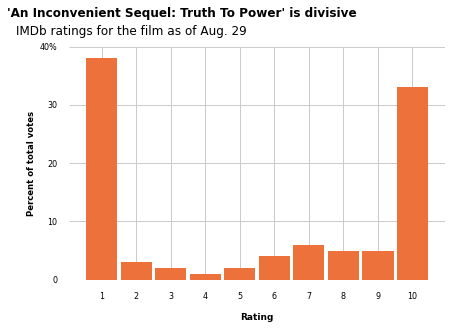

In [ ]:
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# figure background color
fig.set_facecolor('white')

# bars on the graph
ax.bar([1,2,3,4,5,6,7,8,9,10], fake, color='#ED713A', width=.9)

# axes background color
ax.set_facecolor('white')

# axis labels
ax.set_xlabel('Rating', fontweight='bold', fontsize=9, labelpad=12)
ax.set_ylabel('Percent of total votes', fontweight='bold', fontsize=8.5)

# Graph title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=12, fontweight='bold', x=.3, y=1.1)

# Grph subtitle
# bottom left-hand corner of the lable is located somewhere on the axes
# x and y position refers to the x and y axis
ax.text(s="IMDb ratings for the film as of Aug. 29", x=-1.5, y=42, fontsize=12)

# set ticks (x and y)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([0,10,20,30,40])

ax.set_yticklabels([0, 10, 20, 30, '40%'])

# scale down tick labels
ax.tick_params(axis='both', which='major', labelsize=8, pad=12, color='lightgray')

# Turn off the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [ ]:
display(example)

# 2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import csv file
from google.colab import files
uploaded = files.upload()

Saving new-top-firstNames.csv to new-top-firstNames.csv


In [ ]:
df = pd.read_csv('new-top-firstNames.csv')

# Replicating graph from "Dear Mona, What’s The Most Common Name In America?"
![alt text](https://fivethirtyeight.com/wp-content/uploads/2014/11/chalabi-flowers-feature-commonname-1.png?w=575)

In [ ]:
df.head(10)

,Unnamed: 0,name,newPerct2013
0,1,Michael,0.011577
1,2,James,0.010218
2,3,John,0.009675
3,4,Robert,0.009493
4,5,David,0.008943
5,6,William,0.007484
6,7,Mary,0.006839
7,8,Christopher,0.005901
8,9,Joseph,0.005410
9,10,Richard,0.005346


In [ ]:
# Modify data to match the graph
df['newPerct2013_1'] = round(df['newPerct2013'] * 1000, 1)
df.head()

,Unnamed: 0,name,newPerct2013,newPerct2013_1
0,1,Michael,0.011577,11.6
1,2,James,0.010218,10.2
2,3,John,0.009675,9.7
3,4,Robert,0.009493,9.5
4,5,David,0.008943,8.9


In [ ]:
# Truncate dataframe to top20
top20 = df[:20]
top20

,Unnamed: 0,name,newPerct2013,newPerct2013_1
0,1,Michael,0.011577,11.6
1,2,James,0.010218,10.2
2,3,John,0.009675,9.7
3,4,Robert,0.009493,9.5
4,5,David,0.008943,8.9
5,6,William,0.007484,7.5
6,7,Mary,0.006839,6.8
7,8,Christopher,0.005901,5.9
8,9,Joseph,0.005410,5.4
9,10,Richard,0.005346,5.3


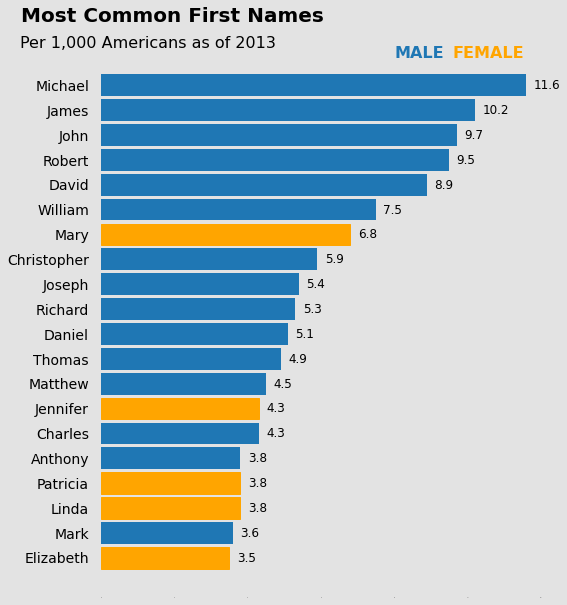

In [ ]:
fig, ax = plt.subplots()

# Set figure size and scale bar graph
fig.set_size_inches(8, 10)
yPos = [x*4 for x in range(1,21)]

# Create horizontal bar graph
ax.barh(yPos, top20['newPerct2013_1'], height=3.5, tick_label=top20['name'], color='#1f77b4')
plt.gca().invert_yaxis()

# Set background to gray
fig.set_facecolor('#e3e3e3')
ax.set_facecolor('#e3e3e3')

# Indicate amount to right of bar
for i, percentage in enumerate(top20['newPerct2013_1']):
    ax.text(percentage + 0.2, i*4 + 4.6, str(percentage), fontsize=12)

# Set text
ax.set_title('Most Common First Names', y=1.04, fontweight='bold', fontsize=20, horizontalalignment='right')
ax.text(s="Per 1,000 Americans as of 2013", x=-2.2, y=-2, fontsize=16)
ax.text(s="MALE", x=8, y=-0.5, fontsize=16, color='#1f77b4', fontweight='bold')
ax.text(s="FEMALE", x=9.6, y=-0.5, fontsize=16, color='orange', fontweight='bold')

# Hide spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Hide ticks by setting length to 0
ax.tick_params(axis='both', which='both',length=0)

# Change label size, padding
ax.tick_params(axis='y', which='major', labelsize=14, pad=12)
ax.tick_params(axis='x', which='major', labelsize=0)

# Change female names to orange
ax.get_children()[6].set_color('orange')
ax.get_children()[13].set_color('orange')
ax.get_children()[16].set_color('orange')
ax.get_children()[17].set_color('orange')
ax.get_children()[19].set_color('orange')

plt.show()


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

![alt text](https://media1.giphy.com/media/Rgbv3oO5WoNzIrEi5q/giphy.gif)

In [ ]:
# More Work Here